<a href="https://colab.research.google.com/github/nazaninbondarian/MachineLearning2024/blob/main/Chapter%201/Question%202/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
%cd ..

/content


In [269]:
import os

# Define the folder name
folder_name = "Data"

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Commented out IPython magic to ensure Python compatibility.
%cd Data

/content/Data


In [270]:
!wget -q https://engineering.case.edu/sites/default/files/97.mat
!wget -q https://engineering.case.edu/sites/default/files/105.mat

In [271]:
from scipy.io import loadmat
NN = loadmat("/content/Data/97.mat")
FF = loadmat("/content/Data/105.mat")

In [272]:
print(NN.keys())
print(FF.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'])


In [273]:
NN1 = NN['X097_DE_time']
NN2 = NN['X097_FE_time']
NN3 = NN['X097RPM']

In [274]:
FF1 = FF['X105_DE_time']
FF2 = FF['X105_FE_time']
FF3 = FF['X105_BA_time']
FF4 = FF['X105RPM']

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
Normal = pd.DataFrame({'X097_DE_time': NN1.flatten(), 'X105_BA_time': NN2.flatten()})
Normal.to_csv("/content/Data/Normal.csv",index=False)
Normal

,X097_DE_time,X105_BA_time
0,0.053197,0.145667
1,0.088662,0.097796
2,0.099718,0.054856
3,0.058621,0.036982
4,-0.004590,0.054445
...,...,...
243933,-0.059664,0.142791
243934,-0.063836,0.148955
243935,-0.034630,0.140531
243936,0.016689,0.095536


In [277]:
Fault = pd.DataFrame({'X105_DE_time': FF1.flatten(), 'X105_FE_time': FF2.flatten(), 'X105_BA_time': FF3.flatten()})
Fault.to_csv("/content/Data/Fault.csv",index=False)
Fault

,X105_DE_time,X105_FE_time,X105_BA_time
0,-0.083004,-0.402075,0.064661
1,-0.195734,-0.004725,-0.023096
2,0.233419,-0.106631,-0.088522
3,0.103958,-0.074169,-0.093632
4,-0.181115,0.208947,-0.076491
...,...,...,...
121260,0.324545,-0.078484,0.010421
121261,0.142456,-0.012327,0.038306
121262,-0.316424,0.315989,0.096489
121263,-0.063675,0.350916,0.084056


In [278]:
print(Normal.isnull().sum())

X097_DE_time    0
X105_BA_time    0
dtype: int64


In [279]:
print(Fault.isnull().sum())

X105_DE_time    0
X105_FE_time    0
X105_BA_time    0
dtype: int64


In [280]:
Normal_data = Normal.X097_DE_time
Normal_data

0         0.053197
1         0.088662
2         0.099718
3         0.058621
4        -0.004590
            ...   
243933   -0.059664
243934   -0.063836
243935   -0.034630
243936    0.016689
243937    0.046938
Name: X097_DE_time, Length: 243938, dtype: float64

In [281]:
Fault_data = Fault.X105_DE_time
Fault_data

0        -0.083004
1        -0.195734
2         0.233419
3         0.103958
4        -0.181115
            ...   
121260    0.324545
121261    0.142456
121262   -0.316424
121263   -0.063675
121264    0.267368
Name: X105_DE_time, Length: 121265, dtype: float64

In [283]:
# Extract 100 samples with length of 200
sample_length = 200
num_samples = 100

In [284]:
Normal_samples = []

# Extract samples from class Normal
for i in range(num_samples):
    start_idx = np.random.randint(0, len(Normal_data) - sample_length + 1)
    sample = Normal_data[start_idx:start_idx + sample_length]
    Normal_samples.append(sample)

Normal_samples

[46631    0.211953
 46632    0.241368
 46633    0.250964
 46634    0.212370
 46635    0.138312
            ...   
 46826    0.110983
 46827    0.152706
 46828    0.157713
 46829    0.129967
 46830    0.038177
 Name: X097_DE_time, Length: 200, dtype: float64,
 29325    0.015020
 29326    0.038385
 29327    0.058204
 29328    0.051319
 29329    0.055283
            ...   
 29520   -0.049859
 29521   -0.026077
 29522    0.001252
 29523    0.047564
 29524    0.078022
 Name: X097_DE_time, Length: 200, dtype: float64,
 109556    0.103056
 109557    0.117450
 109558    0.110983
 109559    0.074267
 109560    0.013769
             ...   
 109751    0.025868
 109752    0.062793
 109753    0.076562
 109754    0.044018
 109755   -0.003755
 Name: X097_DE_time, Length: 200, dtype: float64,
 22299    0.083863
 22300    0.051111
 22301    0.017941
 22302   -0.008136
 22303   -0.010431
            ...   
 22494    0.054449
 22495    0.056326
 22496    0.073433
 22497    0.108271
 22498    0.141441
 Na

In [285]:
# Convert lists of samples to numpy arrays
Normal_samples = np.array(Normal_samples)
Normal_samples.shape

(100, 200)

In [286]:
Fault_samples = []

# Extract samples from class Fault
for i in range(num_samples):
    start_idx = np.random.randint(0, len(Fault_data) - sample_length + 1)
    sample = Fault_data[start_idx:start_idx + sample_length]
    Fault_samples.append(sample)

Fault_samples

[54554    0.141481
 54555   -0.302942
 54556   -0.040609
 54557    0.231308
 54558   -0.023878
            ...   
 54749   -0.116466
 54750   -0.036061
 54751    0.032162
 54752   -0.060263
 54753    0.285236
 Name: X105_DE_time, Length: 200, dtype: float64,
 17463    0.044507
 17464    0.164872
 17465   -0.030050
 17466   -0.030213
 17467    0.152364
            ...   
 17658    0.283449
 17659    0.000812
 17660   -0.104446
 17661    0.161785
 17662    0.108019
 Name: X105_DE_time, Length: 200, dtype: float64,
 21390    0.088690
 21391    0.208892
 21392    0.076832
 21393    0.168933
 21394   -0.726085
            ...   
 21585    0.222374
 21586    0.197684
 21587   -0.115329
 21588   -0.017705
 21589    0.051167
 Name: X105_DE_time, Length: 200, dtype: float64,
 30168    0.298068
 30169   -0.144242
 30170   -0.025827
 30171   -0.222049
 30172   -0.563163
            ...   
 30363    0.070984
 30364    0.129298
 30365   -0.016406
 30366   -0.012020
 30367    0.014294
 Name: X105_DE

In [287]:
# Convert lists of samples to numpy arrays
Fault_samples = np.array(Fault_samples)
Fault_samples.shape

(100, 200)

In [288]:
# Concatenate the data both classes
data_matrix = np.vstack((Normal_samples, Fault_samples))
data_matrix

array([[ 0.21195323,  0.241368  ,  0.25096431, ...,  0.15771323,
         0.12996738,  0.03817662],
       [ 0.01502031,  0.03838523,  0.05820369, ...,  0.00125169,
         0.04756431,  0.07802215],
       [ 0.103056  ,  0.11745046,  0.11098338, ...,  0.07656185,
         0.04401785, -0.00375508],
       ...,
       [-0.03394894, -0.0485681 ,  0.06806032, ..., -0.1119178 ,
        -0.13888204, -0.16324731],
       [ 0.00292383,  0.07472016,  0.06448675, ..., -0.14164343,
         0.11971469,  0.31983477],
       [ 0.26168299,  0.05003002, -0.1988206 , ...,  1.09465034,
         0.36401713, -0.83751553]])

In [289]:
data_matrix.shape

(200, 200)

In [290]:
# Create labels for the samples
Normal_labels = np.ones((num_samples, 1))  # Assuming class Normal is labeled as 1
Fault_labels = np.zeros((num_samples, 1))  # Assuming class Fault  is labeled as 0

In [291]:
# Concatenate the label for both classes
labels = np.vstack((Normal_labels, Fault_labels))
labels

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
labels.shape

In [292]:
# Concatenate the data and labels for both classes
main_matrix = np.hstack((data_matrix, labels))
main_matrix

array([[ 0.21195323,  0.241368  ,  0.25096431, ...,  0.12996738,
         0.03817662,  1.        ],
       [ 0.01502031,  0.03838523,  0.05820369, ...,  0.04756431,
         0.07802215,  1.        ],
       [ 0.103056  ,  0.11745046,  0.11098338, ...,  0.04401785,
        -0.00375508,  1.        ],
       ...,
       [-0.03394894, -0.0485681 ,  0.06806032, ..., -0.13888204,
        -0.16324731,  0.        ],
       [ 0.00292383,  0.07472016,  0.06448675, ...,  0.11971469,
         0.31983477,  0.        ],
       [ 0.26168299,  0.05003002, -0.1988206 , ...,  0.36401713,
        -0.83751553,  0.        ]])

In [293]:
main_matrix.shape

(200, 201)

In [295]:
# Calculate Standard Deviation of each feature
std_dev_values = np.std(data_matrix, axis=1)
std_dev_values

array([0.09200863, 0.0839269 , 0.08670391, 0.05264824, 0.06120394,
       0.05851977, 0.0755741 , 0.0779448 , 0.08806178, 0.04747912,
       0.06742667, 0.06282725, 0.06873904, 0.07845751, 0.07913488,
       0.07838357, 0.07880552, 0.08482927, 0.07497088, 0.06392385,
       0.07101477, 0.07404335, 0.07674816, 0.07745512, 0.10200256,
       0.06058869, 0.06165046, 0.05630576, 0.06184986, 0.07787142,
       0.06340406, 0.08862865, 0.06765421, 0.08723028, 0.08425243,
       0.06185017, 0.05172113, 0.07318093, 0.09614063, 0.07916327,
       0.06877278, 0.08806528, 0.05748889, 0.0872387 , 0.07758365,
       0.05920294, 0.07983552, 0.07428519, 0.07542122, 0.08227847,
       0.08218038, 0.08852825, 0.07145799, 0.0601655 , 0.07399257,
       0.06756277, 0.06644351, 0.07579892, 0.0887586 , 0.06544818,
       0.07503066, 0.06429953, 0.08765855, 0.0620142 , 0.07033445,
       0.08219386, 0.06223537, 0.08287634, 0.07788786, 0.08335081,
       0.05675307, 0.06990076, 0.06446915, 0.07562672, 0.08527

In [297]:
# Calculate Peak of each feature
peak_values = np.max(np.abs(data_matrix),axis=1)
peak_values

array([0.25096431, 0.23156308, 0.23761292, 0.15270646, 0.15896492,
       0.19484677, 0.17648862, 0.21654277, 0.22655631, 0.15520985,
       0.18796246, 0.21070154, 0.17377662, 0.19881046, 0.20673785,
       0.17669723, 0.20944985, 0.22467877, 0.17920062, 0.17189908,
       0.20402585, 0.2034    , 0.16605785, 0.18462462, 0.22676492,
       0.16522338, 0.17690585, 0.16230277, 0.19651569, 0.19881046,
       0.15354092, 0.20152246, 0.20214831, 0.219672  , 0.21195323,
       0.20110523, 0.17419385, 0.19735015, 0.24741785, 0.20506892,
       0.18003508, 0.20757231, 0.16251138, 0.18608492, 0.2034    ,
       0.17398523, 0.18691938, 0.20506892, 0.16355446, 0.22217538,
       0.20861538, 0.25617969, 0.15792185, 0.18024369, 0.20861538,
       0.17043877, 0.18483323, 0.21111877, 0.25263323, 0.16084246,
       0.18086954, 0.20173108, 0.23698708, 0.17023015, 0.17273354,
       0.19964492, 0.20047938, 0.22217538, 0.18691938, 0.24053354,
       0.14853415, 0.18587631, 0.17106462, 0.18066092, 0.27140

In [298]:
# Calculate Crest Factor of each feature
crest_factor_values = np.max(np.abs(data_matrix),axis=1) / np.sqrt(np.mean(data_matrix**2, axis=1))
crest_factor_values

array([2.69562596, 2.7039241 , 2.6913678 , 2.85531891, 2.49329198,
       3.25080773, 2.33448166, 2.75558842, 2.49441803, 3.24750828,
       2.76920432, 3.18973903, 2.49088075, 2.46266122, 2.58693425,
       2.25425509, 2.58643342, 2.61225105, 2.38556747, 2.65865787,
       2.78186196, 2.63460043, 2.10928625, 2.37996773, 2.1934946 ,
       2.71673168, 2.75441415, 2.81646329, 3.16437108, 2.46562815,
       2.37259068, 2.23215729, 2.89250832, 2.47512512, 2.45001298,
       3.09910592, 3.34958185, 2.64092244, 2.53197025, 2.54499962,
       2.55682347, 2.27998538, 2.82651158, 2.12699647, 2.5846538 ,
       2.87773406, 2.33446002, 2.68466235, 2.13579666, 2.61978023,
       2.5145901 , 2.86294661, 2.17339151, 2.92114006, 2.76122642,
       2.49630665, 2.7678273 , 2.7079286 , 2.82599036, 2.39088187,
       2.38895875, 3.07781242, 2.62525991, 2.71335672, 2.42632552,
       2.42026847, 3.19675072, 2.6566761 , 2.3135748 , 2.85458515,
       2.52353712, 2.65897291, 2.58559313, 2.3658656 , 3.09419

In [299]:
# Calculate Peak to Peak of each feature
peak_to_peak_values = np.max(data_matrix, axis=1)-np.min(data_matrix, axis=1)
peak_to_peak_values

array([0.45499015, 0.39324   , 0.39991569, 0.27203446, 0.31229723,
       0.347136  , 0.33148985, 0.414936  , 0.40596554, 0.28538585,
       0.34484123, 0.34671877, 0.31626092, 0.357984  , 0.40492246,
       0.35276862, 0.40346215, 0.43600615, 0.35840123, 0.31646954,
       0.35714954, 0.38593846, 0.32919508, 0.33607938, 0.44977477,
       0.30207508, 0.31542646, 0.25471938, 0.31918154, 0.36820615,
       0.27745846, 0.39094523, 0.32147631, 0.41180677, 0.36987508,
       0.38489538, 0.27871015, 0.34651015, 0.45916246, 0.357984  ,
       0.29706831, 0.39177969, 0.28496862, 0.37070954, 0.36319938,
       0.27891877, 0.36632862, 0.34797046, 0.32189354, 0.37988862,
       0.37196123, 0.43684062, 0.31146277, 0.30833354, 0.39449169,
       0.31021108, 0.34692738, 0.36778892, 0.42682708, 0.29581662,
       0.34901354, 0.33128123, 0.45457292, 0.30583015, 0.34484123,
       0.387816  , 0.34692738, 0.41347569, 0.36632862, 0.38906769,
       0.28684615, 0.34192062, 0.30457846, 0.34150338, 0.49483

In [301]:
# Calculate Shape Factor of each feature
shape_factor_values = np.sqrt(np.mean(data_matrix**2, axis=1))/np.mean(np.abs(data_matrix), axis=1)
shape_factor_values

array([1.23715392, 1.18628661, 1.21215256, 1.24754207, 1.22282256,
       1.29566272, 1.20763477, 1.23656645, 1.22840724, 1.267174  ,
       1.29598781, 1.23757724, 1.2166695 , 1.21676437, 1.25084955,
       1.23145003, 1.21194316, 1.25269838, 1.19021614, 1.27880349,
       1.23053236, 1.27307003, 1.20395228, 1.23079448, 1.22032645,
       1.22854154, 1.27903226, 1.2654403 , 1.3034261 , 1.25440675,
       1.24597112, 1.18439257, 1.21695495, 1.19242401, 1.23211124,
       1.28070428, 1.25014341, 1.22587968, 1.20330343, 1.21213746,
       1.22755379, 1.20456067, 1.20791859, 1.18736307, 1.22903117,
       1.26136557, 1.20772394, 1.21827999, 1.18923799, 1.24686813,
       1.2048327 , 1.21344549, 1.20262261, 1.24358784, 1.2447214 ,
       1.21393709, 1.22874567, 1.25832888, 1.22223682, 1.19106596,
       1.24304569, 1.25635985, 1.24357065, 1.28681247, 1.23451422,
       1.19681789, 1.25408931, 1.22489304, 1.20041987, 1.23360031,
       1.29266561, 1.22033502, 1.26182956, 1.19712652, 1.22598

In [302]:
# Calculate Mean of each feature
mean_values = np.mean(data_matrix, axis=1)
mean_values

array([ 0.01421714,  0.01704179,  0.01664438,  0.00940334,  0.01786165,
        0.01296127,  0.00200792,  0.00999581,  0.02223423,  0.00547302,
        0.007797  ,  0.02039946,  0.01192133,  0.01901946,  0.01114736,
       -0.00021592,  0.01864083,  0.01420045,  0.00470949,  0.00970479,
        0.01832686,  0.02186185,  0.01754038,  0.00430061,  0.01682379,
        0.00526441,  0.01800664,  0.01226658,  0.00559715,  0.02092099,
        0.0129571 ,  0.01719617,  0.01752369,  0.01636379,  0.01963905,
        0.01963279,  0.00542296,  0.01512566,  0.01748406,  0.01502865,
        0.0151121 ,  0.02308642, -0.00086471,  0.00658912,  0.01318032,
        0.01226033,  0.00611869,  0.01778863,  0.01325855,  0.02055383,
        0.01136119,  0.01302386,  0.01316989,  0.01368934,  0.0152696 ,
        0.0098456 ,  0.00668717,  0.01824237,  0.0106592 ,  0.01556375,
        0.0101241 ,  0.01270989,  0.02156353,  0.00950139,  0.01101281,
        0.0069688 ,  0.0077292 ,  0.01119534,  0.02146861,  0.01

In [304]:
# Calculate Root Mean Square of each feature
rms_values = np.sqrt(np.mean(data_matrix**2, axis=1))
rms_values

array([0.09310057, 0.08563964, 0.08828705, 0.0534814 , 0.06375704,
       0.05993796, 0.07560077, 0.07858313, 0.09082532, 0.04779352,
       0.06787598, 0.06605604, 0.06976513, 0.08072993, 0.07991616,
       0.07838387, 0.08098018, 0.08600964, 0.07511865, 0.06465634,
       0.07334147, 0.07720336, 0.07872703, 0.07757442, 0.10338066,
       0.06081697, 0.06422631, 0.05762645, 0.06210261, 0.08063278,
       0.06471446, 0.09028148, 0.06988685, 0.08875188, 0.08651106,
       0.06489137, 0.05200465, 0.07472774, 0.09771752, 0.08057719,
       0.07041357, 0.09104107, 0.05749539, 0.08748718, 0.07869526,
       0.06045911, 0.08006964, 0.07638537, 0.07657773, 0.08480688,
       0.08296198, 0.08948113, 0.07266148, 0.0617032 , 0.07555171,
       0.06827638, 0.06677918, 0.0779632 , 0.08939635, 0.06727328,
       0.07571062, 0.06554366, 0.09027185, 0.06273785, 0.07119141,
       0.08248875, 0.06271349, 0.08362908, 0.08079245, 0.08426217,
       0.05885951, 0.0699053 , 0.06616069, 0.07636145, 0.08771

In [305]:
# Calculate Absolute Mean of each feature
absolute_mean_values = np.mean(np.abs(data_matrix), axis=1)
absolute_mean_values

array([0.07525383, 0.07219135, 0.07283493, 0.04286942, 0.05213924,
       0.04626046, 0.06260235, 0.06354946, 0.07393746, 0.03771662,
       0.05237394, 0.05337529, 0.05734107, 0.06634804, 0.0638895 ,
       0.06365168, 0.06681846, 0.0686595 , 0.06311346, 0.05056002,
       0.05960142, 0.06064345, 0.06539049, 0.06302792, 0.08471558,
       0.04950339, 0.05021477, 0.04553865, 0.04764567, 0.06427962,
       0.05193897, 0.07622598, 0.05742764, 0.0744298 , 0.07021368,
       0.0506685 , 0.04159895, 0.06095846, 0.08120771, 0.06647529,
       0.05736089, 0.07558031, 0.04759873, 0.07368191, 0.06403032,
       0.04793147, 0.06629797, 0.06269935, 0.06439227, 0.06801592,
       0.06885768, 0.07374137, 0.06041919, 0.04961708, 0.06069769,
       0.05624375, 0.05434744, 0.06195773, 0.0731416 , 0.05648157,
       0.06090735, 0.05216949, 0.07259085, 0.04875446, 0.05766755,
       0.06892339, 0.05000719, 0.0682746 , 0.0673035 , 0.06830589,
       0.04553344, 0.0572837 , 0.05243235, 0.06378728, 0.07154

In [306]:
# Calculate Impulse Factor of each feature
impulse_factor_values = np.abs(np.max(data_matrix,axis=1))/np.mean(np.abs(data_matrix), axis=1)
impulse_factor_values

array([3.33490422, 3.20762896, 3.26234838, 3.56213047, 3.04885368,
       3.29199549, 2.47596514, 3.4074682 , 3.06416116, 4.11515805,
       2.99535958, 3.94754842, 3.03057865, 2.99647843, 3.23586554,
       2.77600249, 2.90357327, 3.07790472, 2.8393409 , 3.39990097,
       3.42317116, 3.35403086, 2.49481576, 2.4029789 , 2.6324538 ,
       3.33761773, 3.52298457, 3.56406615, 4.12452384, 3.09290061,
       2.95617946, 2.48501601, 3.52005231, 2.95139862, 3.01868853,
       3.62730567, 4.18745769, 3.23745316, 3.04672849, 3.08488938,
       3.13863835, 2.43724037, 3.41419587, 2.52551707, 2.49568305,
       3.62987465, 2.81938326, 3.27067044, 2.53997052, 3.26652047,
       2.37222407, 3.47402965, 2.54126096, 3.63269425, 3.06232923,
       3.03035923, 3.4009558 , 3.40746477, 3.45402946, 2.84769802,
       2.76065214, 3.86683995, 3.26469616, 2.7812841 , 2.99533336,
       2.89662061, 4.00901089, 2.80192499, 2.77726117, 3.52141712,
       3.26208966, 3.24483776, 3.26257783, 2.83224045, 3.79344

In [307]:
# Concatenate features selection Matrix
features = np.column_stack((std_dev_values, peak_values, crest_factor_values, peak_to_peak_values, shape_factor_values,mean_values, absolute_mean_values,rms_values, impulse_factor_values))
features.shape

(200, 9)

In [308]:
# Create DataFrame
Data = pd.DataFrame(features, columns=['Standard Deviation','Peak', 'Crest Factor', 'Peak to Peak','Shape Factor', 'Mean', 'Absolute Mean', 'RMS', 'Impulse Factor'])
Data

,Standard Deviation,Peak,Crest Factor,Peak to Peak,Shape Factor,Mean,Absolute Mean,RMS,Impulse Factor
0,0.092009,0.250964,2.695626,0.454990,1.237154,0.014217,0.075254,0.093101,3.334904
1,0.083927,0.231563,2.703924,0.393240,1.186287,0.017042,0.072191,0.085640,3.207629
2,0.086704,0.237613,2.691368,0.399916,1.212153,0.016644,0.072835,0.088287,3.262348
3,0.052648,0.152706,2.855319,0.272034,1.247542,0.009403,0.042869,0.053481,3.562130
4,0.061204,0.158965,2.493292,0.312297,1.222823,0.017862,0.052139,0.063757,3.048854
...,...,...,...,...,...,...,...,...,...
195,0.308646,1.175705,3.805820,2.114256,1.349204,0.013089,0.228967,0.308923,5.134826
196,0.274069,1.025291,3.737541,1.974237,1.376851,0.011794,0.199239,0.274322,5.146037
197,0.283138,0.972174,3.431362,1.825284,1.364729,0.010159,0.207602,0.283320,4.682879
198,0.316214,1.135422,3.586264,2.100449,1.337485,0.015678,0.236715,0.316603,4.076745


In [310]:
# Shuffle the Data in place
Labeled_Data=np.hstack((Data, labels))
np.random.seed(76)
np.random.shuffle(Labeled_Data)
Labeled_Data

array([[0.27566915, 1.21030415, 4.38482532, ..., 0.27602106, 5.92883174,
        0.        ],
       [0.07472695, 0.21925477, 2.85661236, ..., 0.07675342, 3.73775273,
        1.        ],
       [0.0779448 , 0.21654277, 2.75558842, ..., 0.07858313, 3.4074682 ,
        1.        ],
       ...,
       [0.28437369, 1.09091433, 3.83339284, ..., 0.28458193, 5.48773512,
        0.        ],
       [0.27503903, 0.99394056, 3.60805751, ..., 0.27547803, 4.61256182,
        0.        ],
       [0.30836715, 1.05810244, 3.42752026, ..., 0.30870786, 4.64789386,
        0.        ]])

In [311]:
Labeled_Data = pd.DataFrame(Labeled_Data,  columns=['Standard Deviation','Peak', 'Crest Factor', 'Peak to Peak','Shape Factor', 'Mean', 'Absolute Mean', 'RMS', 'Impulse Factor', 'Target'])
Labeled_Data

,Standard Deviation,Peak,Crest Factor,Peak to Peak,Shape Factor,Mean,Absolute Mean,RMS,Impulse Factor,Target
0,0.275669,1.210304,4.384825,2.014358,1.352125,0.013934,0.204139,0.276021,5.928832,0.0
1,0.074727,0.219255,2.856612,0.402002,1.308456,0.017521,0.058660,0.076753,3.737753,1.0
2,0.077945,0.216543,2.755588,0.414936,1.236566,0.009996,0.063549,0.078583,3.407468,1.0
3,0.300175,0.825820,2.748841,1.647580,1.340324,0.012244,0.224143,0.300425,3.666221,0.0
4,0.075741,0.176906,2.317861,0.346927,1.233349,0.009410,0.061883,0.076323,2.858732,1.0
...,...,...,...,...,...,...,...,...,...,...
195,0.057489,0.162511,2.826512,0.284969,1.207919,-0.000865,0.047599,0.057495,3.414196,1.0
196,0.061650,0.176906,2.754414,0.315426,1.279032,0.018007,0.050215,0.064226,3.522985,1.0
197,0.284374,1.090914,3.833393,2.007048,1.431561,0.010885,0.198791,0.284582,5.487735,0.0
198,0.275039,0.993941,3.608058,1.918846,1.373826,0.015546,0.200519,0.275478,4.612562,0.0


In [312]:
Labeled_Data.shape

(200, 10)

In [314]:
X = Labeled_Data[['Standard Deviation','Peak', 'Crest Factor', 'Peak to Peak','Shape Factor', 'Mean', 'Absolute Mean', 'RMS', 'Impulse Factor']].values
y = Labeled_Data[['Target']].values

In [315]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160, 1), (40, 9), (40, 1))

In [317]:
#Normalizing Data
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
x_train_n = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
x_test_n = scaler.fit_transform(X_test)

# Check the shapes of the normalized data
x_train_n.shape, x_test_n.shape, y_train.shape, y_test.shape


((160, 9), (40, 9), (160, 1), (40, 1))

In [318]:
#Logistic Regression (from Scratch)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

In [320]:
#Binary Cross Entropy (BCE)
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

In [321]:
#Gradient
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads


In [322]:
#Gradient Descent
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [324]:
#Accuracy
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

In [325]:
#Presition
def precition(y, y_hat):
  # true positives and false positive
  TFP = []
  for i in range(len(y_hat)):
    if y_hat[i]>0.5:
      TFP.append(i)
  P = []
  for j in range(len(y)):
    if y[j]==1:
      P.append(j)

  TP = []
  for k in range(len(TFP)):
    if P[k]==TFP[k]:
      TP.append(k)

  pre = len(TP)/len(TFP)
  return pre

In [330]:
#hyper parameter
m = 9
w = np.random.randn(m+1, 1)
print(w.shape)
eta = 0.05
n_epochs = 2000


(10, 1)


In [331]:
x_train = np.hstack((np.ones((len(x_train_n), 1)), x_train_n))
x_train.shape


(160, 10)

Epoch=99, 	 E=0.3403,	 w=[ 1.32140119  0.55866577 -0.65055856 -0.00806655 -1.02404343  0.10827786
 -1.17205333  0.49216319 -2.59055788  0.20175978]
Epoch=199, 	 E=0.2342,	 w=[ 1.79992487  0.34827774 -0.8391931  -0.06697981 -1.23690767  0.0407699
 -0.89892142  0.29630692 -2.79788387  0.13817385]
Epoch=299, 	 E=0.1759,	 w=[ 2.13307712  0.17883854 -0.98850247 -0.11895903 -1.4054839  -0.01809994
 -0.70996371  0.1367178  -2.96510174  0.08368069]
Epoch=399, 	 E=0.1398,	 w=[ 2.3904693   0.04253086 -1.10757787 -0.16107825 -1.54015746 -0.0659227
 -0.56534329  0.00774665 -3.09968568  0.03986716]
Epoch=499, 	 E=0.1157,	 w=[ 2.59962604 -0.07042171 -1.20564973 -0.19586438 -1.65124675 -0.10556173
 -0.44894129 -0.09944108 -3.21124169  0.00382377]
Epoch=599, 	 E=0.09852,	 w=[ 2.77534501 -0.16650009 -1.28867517 -0.22530502 -1.74541213 -0.13922149
 -0.35202434 -0.19081788 -3.30615254 -0.02660534]
Epoch=699, 	 E=0.08571,	 w=[ 2.92660197 -0.24994    -1.36050092 -0.25074438 -1.82696099 -0.16839144
 -0.2692

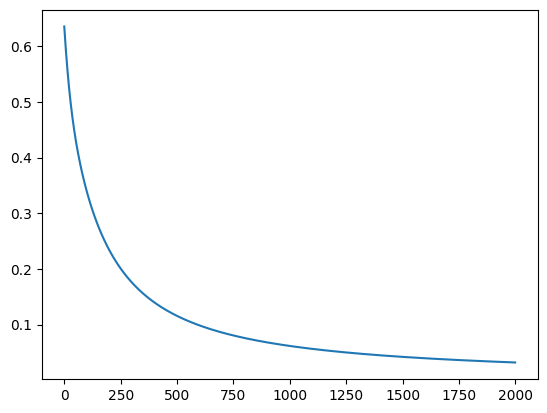

In [332]:
error_hist = []
for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

plt.plot(error_hist)

In [334]:
# Test
x_test = np.hstack((np.ones((len(x_test_n), 1)), x_test_n))
x_test.shape

(40, 10)

In [335]:
y_pred = logistic_regression(x_test, w)
accuracy(y_test, y_pred)

1.0

In [336]:
precition(y_test,y_pred)

1.0

In [337]:
y_pred

array([[0.95849867],
       [0.97210133],
       [0.00119896],
       [0.00435994],
       [0.96777005],
       [0.01573956],
       [0.00781737],
       [0.9709334 ],
       [0.98339217],
       [0.03083139],
       [0.16676579],
       [0.00851762],
       [0.03048643],
       [0.040105  ],
       [0.9635223 ],
       [0.97284641],
       [0.00653276],
       [0.03973272],
       [0.09433263],
       [0.0185986 ],
       [0.03248791],
       [0.01554078],
       [0.97820174],
       [0.0175628 ],
       [0.0028099 ],
       [0.97087643],
       [0.00702452],
       [0.01051044],
       [0.02271488],
       [0.94855599],
       [0.95542978],
       [0.00154757],
       [0.96855743],
       [0.97170194],
       [0.02564655],
       [0.03971071],
       [0.0395933 ],
       [0.00190508],
       [0.96826617],
       [0.0415273 ]])

In [338]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='sag', max_iter=200, random_state=14)
model.fit(x_train_n, y_train)
y_pred_s = model.predict(x_test_n)
y_pred_s

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0.])

In [339]:
model.score(x_test_n,y_test)

1.0

In [340]:
# Calculate residuals
residuals = y_test[:,0] - y_pred_s

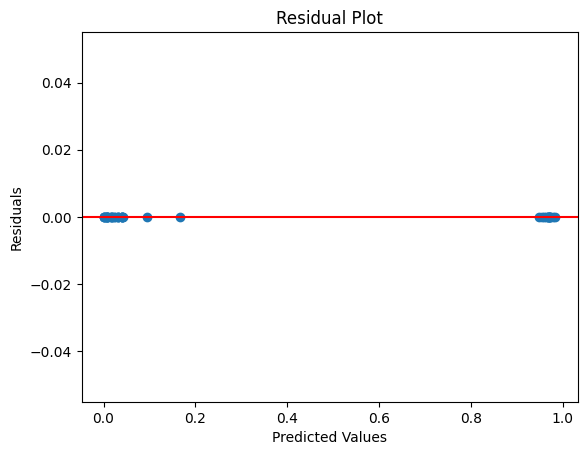

In [341]:
# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()